In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

# Data Preparation

In [151]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [152]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [153]:
print("Train Dataset row and col: ",df_train.shape)
print("Test Dataset row and col: ",df_test.shape)

Train Dataset row and col:  (9557, 143)
Test Dataset row and col:  (23856, 142)


In [154]:
df_train.head(2)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.0,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.0,64.0,144.0,4489,4


In [155]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
v2a1,2697.0,165231.606971,150457.133301,0.00,80000.000000,130000.000000,200000.000000,2353477.0
hacdor,9557.0,0.038087,0.191417,0.00,0.000000,0.000000,0.000000,1.0
rooms,9557.0,4.955530,1.468381,1.00,4.000000,5.000000,6.000000,11.0
hacapo,9557.0,0.023648,0.151957,0.00,0.000000,0.000000,0.000000,1.0
v14a,9557.0,0.994768,0.072145,0.00,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...
SQBovercrowding,9557.0,3.249485,4.129547,0.04,1.000000,2.250000,4.000000,36.0
SQBdependency,9557.0,3.900409,12.511831,0.00,0.111111,0.444444,1.777778,64.0
SQBmeaned,9552.0,102.588867,93.516890,0.00,36.000000,81.000000,134.560010,1369.0
agesq,9557.0,1643.774302,1741.197050,0.00,289.000000,961.000000,2601.000000,9409.0


## Reduce Mem Usage

In [156]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage has been reduced from {:6.2f} Mb to {:5.2f} Mb ({:.1f}% reduction)'
              .format(start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [240]:
reduce_mem_usage(df_train)
reduce_mem_usage(df_test)

Mem. usage has been reduced from  25.85 Mb to  4.37 Mb (83.1% reduction)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.2500,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.2500,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.2500,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.0000,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,...,10,9,100,36,25,4,36.00,0.25,33.0625,100
23852,ID_1a7c6953b,NaN,0,3,0,1,1,0,NaN,0,...,54,36,2916,16,36,4,4.00,1.00,36.0000,2916
23853,ID_07dbb4be2,NaN,0,3,0,1,1,0,NaN,0,...,12,16,144,16,36,4,4.00,1.00,36.0000,144
23854,ID_34d2ed046,NaN,0,3,0,1,1,0,NaN,0,...,12,25,144,16,36,4,4.00,1.00,36.0000,144


## Handling null values

In [158]:
df_train.isnull().sum().sort_values(ascending=False).head(6)
#theres 5 columns that have missing value

rez_esc      7928
v18q1        7342
v2a1         6860
meaneduc        5
SQBmeaned       5
techozinc       0
dtype: int64

count    9552.000000
mean             inf
std         4.167969
min         0.000000
25%         6.000000
50%         9.000000
75%        11.601562
max        37.000000
Name: meaneduc, dtype: float64


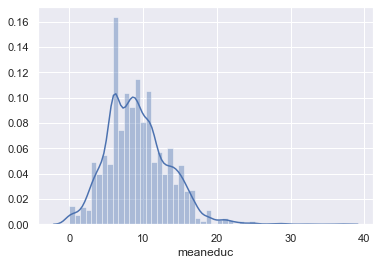

In [159]:
#because the type of this series is float and there are some outlier in this series. i choose median imputed method
df_train["meaneduc"].dtypes
print(df_train["meaneduc"].describe())
sns.distplot(df_train["meaneduc"])
df_train["meaneduc"] = df_train["meaneduc"].fillna(df_train["meaneduc"].median())
plt.show()

count    9552.0
mean        inf
std         inf
min         0.0
25%        36.0
50%        81.0
75%       134.5
max      1369.0
Name: SQBmeaned, dtype: float64


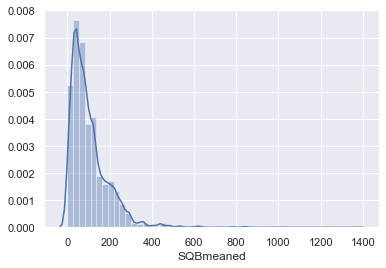

In [160]:
#because the type of this series is float and there are some outlier in this series. i choose median imputed method
df_train["SQBmeaned"].dtypes
print(df_train["SQBmeaned"].describe())
sns.distplot(df_train["SQBmeaned"])
plt.show()
df_train["SQBmeaned"] = df_train["SQBmeaned"].fillna(df_train["SQBmeaned"].median())

In [161]:
print(df_train["rez_esc"].value_counts())
print("Null Values :", df_train["rez_esc"].isna().sum())

print(df_train["v18q1"].value_counts())
print("Null Values :", df_train["v18q1"].isna().sum())

print(df_train["v2a1"].value_counts().head(5))
print("\n")
print("Not Null Values :", df_train["v2a1"].value_counts().sum())
print("Null Values :", df_train["v2a1"].isna().sum())

0.0    1211
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: rez_esc, dtype: int64
Null Values : 7928
1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64
Null Values : 7342
150000.0    233
100000.0    181
200000.0    159
120000.0    149
50000.0     118
Name: v2a1, dtype: int64


Not Null Values : 2697
Null Values : 6860


In [162]:
# because these columns have more nullvalue in the composition. i choose to dropped these columns
df_train.drop(["rez_esc", "v18q1", "v2a1"], axis=1, inplace=True)

In [163]:
df_train.isna().sum().sort_values(ascending=False)
# theres no more missing value again

Target        0
planpri       0
sanitario5    0
sanitario3    0
sanitario2    0
             ..
edjefa        0
meaneduc      0
instlevel1    0
instlevel2    0
Id            0
Length: 140, dtype: int64

## EDA

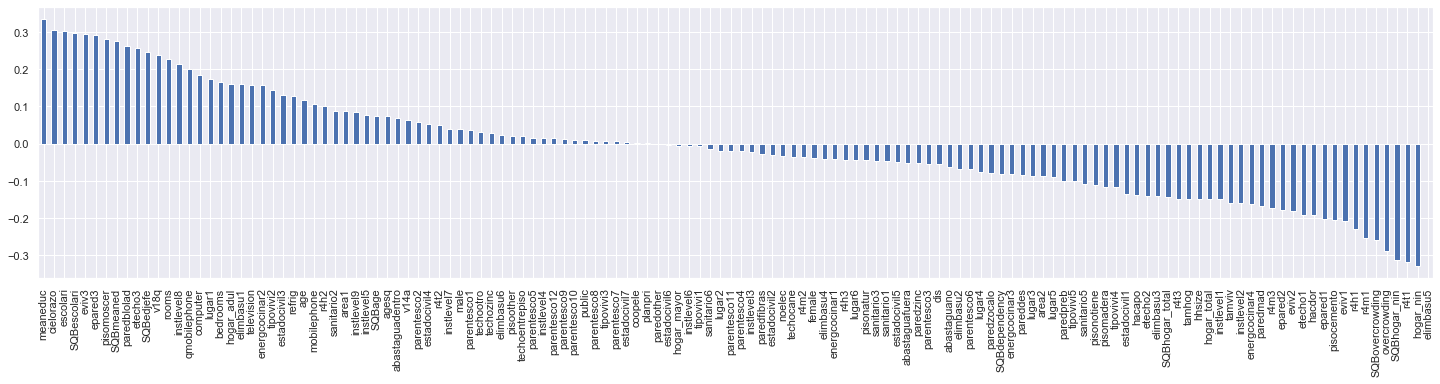

In [164]:
plt.figure(figsize=(25,5))
df_train.corr()["Target"].sort_values(ascending=False)[1:].plot(kind="bar")

In [165]:
df_train["Target"].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [166]:
levels = ["NonVulnerable", "Moderate Poverty", "Vulnerable", "Extereme Poverty"]
df_train["Target"] = df_train["Target"].map({
    1:"Extreme Poverty",
    2:"Moderate Poverty",
    3:"Vulnerable",
    4:"NonVulnerable"
})

In [167]:
df_train.rename({"v18q":"tablet"}, axis=1, inplace=True)
df_test.rename({"v18q":"tablet"}, axis=1, inplace=True)

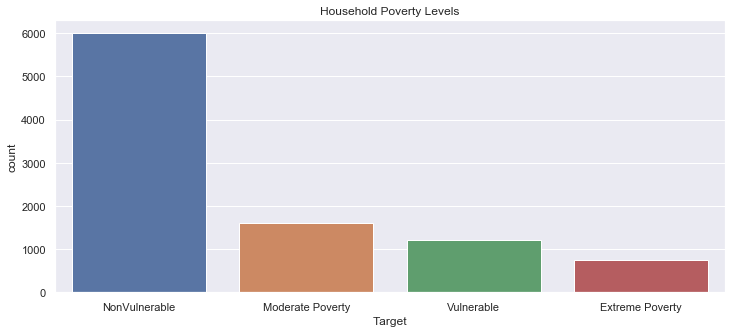

In [168]:
plt.figure(figsize=(12,5))
plt.title("Household Poverty Levels")
sns.countplot(df_train["Target"])
plt.show()

In [169]:
def owner(col):
    plt.figure(figsize=(12,5))
    plt.title(f"{col} Ownership".capitalize())
    sns.countplot(y=df_train["Target"], hue=df_train[col])
    plt.legend(title=f"{col}", labels=[f"Don't Have {col}", f"Have {col}"])
    plt.show()

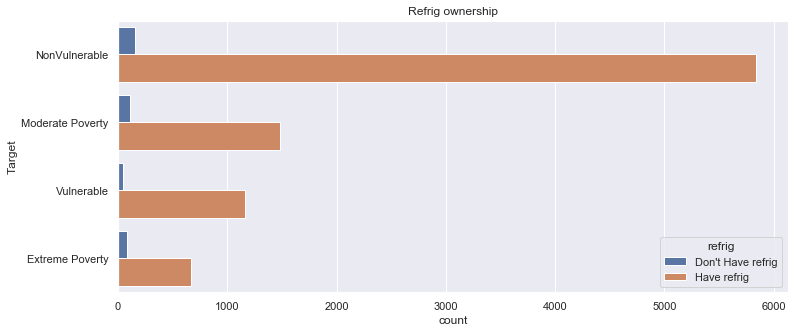

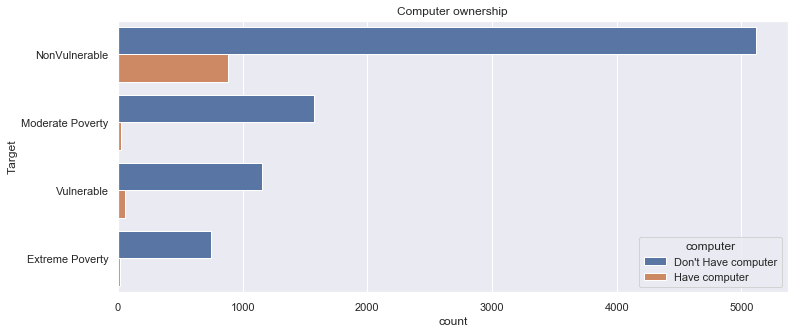

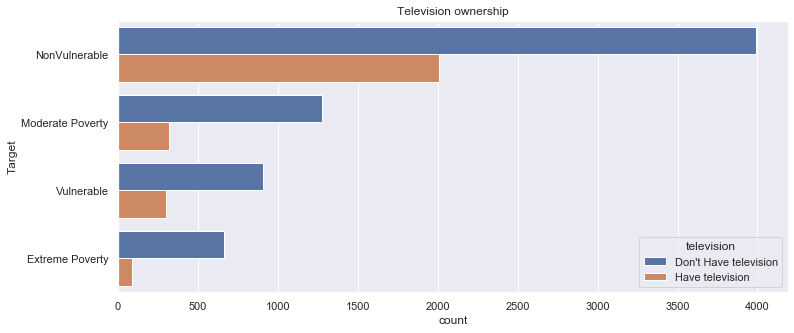

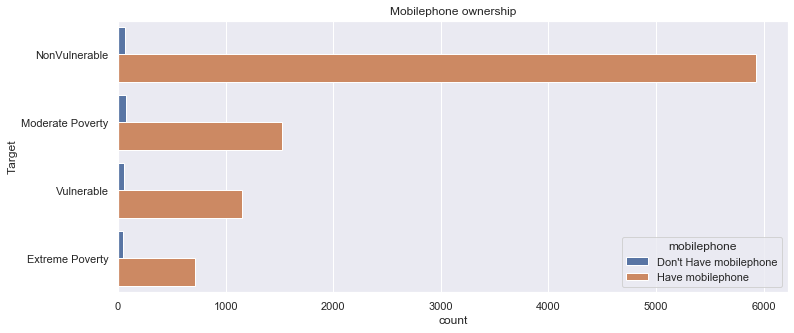

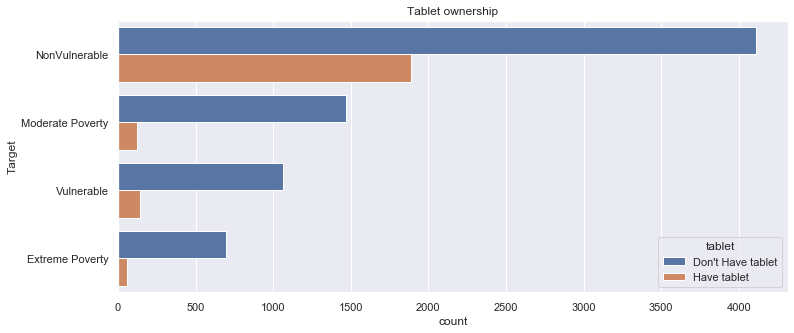

In [170]:
owner("refrig")
owner("computer")
owner("television")
owner("mobilephone")
owner("tablet")

Household Poverty Class Based on Location 

Target  Extreme Poverty  Moderate Poverty  NonVulnerable  Vulnerable
area1                                                               
Rural               500              1052           4496         781
Urban               255               545           1500         428


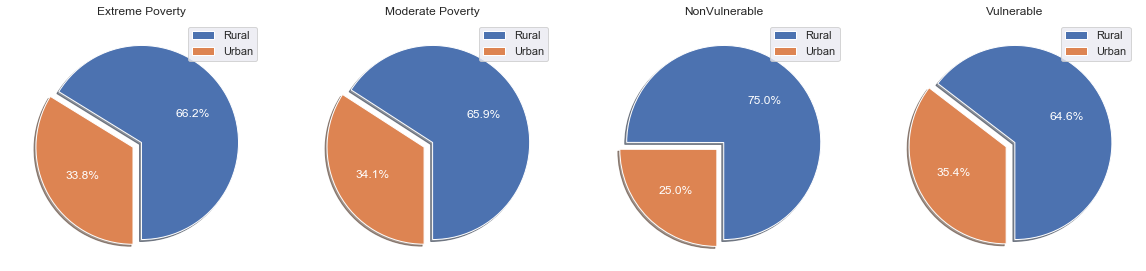

In [207]:
loc = df_train["area1"].apply(lambda x: "Urban" if x== 0 else "Rural")
df_loc = pd.crosstab(df_train["Target"], loc).T
print("Household Poverty Class Based on Location \n")
print(df_loc)
plt.figure(figsize=(20,15))

for i,v in enumerate(df_loc.columns):
    plt.subplot(1,4,i+1)
    plt.title(v)
    plt.pie(df_loc[v],autopct='%1.1f%%',
        startangle=270, shadow=True, explode=(0,.1), textprops={'color':"w","size":12}, labels=["Rural","Urban"])
    plt.legend(labels=["Rural","Urban"])

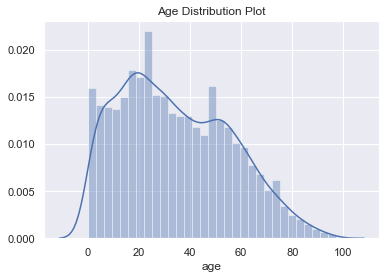

In [215]:
plt.title("Age Distribution Plot")
sns.distplot(df_train.age)
plt.show()

# Modeling

## Handling Categorical data

In [224]:
features = [c for c in df_train.columns if c not in ['Id', 'Target']]
num_cols = df_train._get_numeric_data().columns
cat_cols = list(set(features) - set(num_cols))

In [226]:
df_train[cat_cols].head(2)

,edjefe,edjefa,idhogar,dependency
0,10,no,21eb7fcc1,no
1,12,no,0e5d7a658,8


In [245]:
def label_encoding(col):
    le = LabelEncoder()
    le.fit(list(df_train[col].values) + list(df_test[col].values))
    df_train[col] = le.transform(df_train[col].astype(str))
    df_test[col] = le.transform(df_test[col].astype(str))
    
for col in cat_cols:
    label_encoding(col)

In [286]:
a = [5, 10, 15, 5, 15]
mean = np.mean([5, 10, 15, 5, 15])
[a-mean for i in a]
    

[array([-5.,  0.,  5., -5.,  5.]),
 array([-5.,  0.,  5., -5.,  5.]),
 array([-5.,  0.,  5., -5.,  5.]),
 array([-5.,  0.,  5., -5.,  5.]),
 array([-5.,  0.,  5., -5.,  5.])]

In [252]:
df_train.nunique().sort_values(ascending=False)

Id              9557
idhogar         2988
meaneduc         155
SQBmeaned        155
SQBage            97
                ... 
male               2
female             2
estadocivil1       2
eviv3              2
elimbasu5          1
Length: 140, dtype: int64

In [261]:
# drop ID and idhogar due to contiunues values
df_train.drop(["Id","idhogar"], axis=1, inplace=True)
df_test.drop(["Id","idhogar"], axis=1, inplace=True)

In [266]:
# spliting dataset
x = df_train.drop("Target", axis=1)
y = df_train["Target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=28)

In [270]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
sv = SVC()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
kn = KNeighborsClassifier()

model = [lr,dt,sv,rf,kn,gb]
model_name = {lr:"Logistic Regression", rf:"Random Forest", kn:"KNN",sv:"SVC",dt:"Decision Tree",gb:"Gradient Boosting"}

In [272]:
for i in model:
    i.fit(x_train,y_train)
    print(model_name[i],"score:",i.score(x_test,y_test))

C:\Users\bima\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression score: 0.6698744769874477
Decision Tree score: 0.9175732217573221
SVC score: 0.6506276150627615
Random Forest score: 0.9158995815899582
KNN score: 0.5916317991631799
Gradient Boosting score: 0.7569037656903765
